# Support Vector Regression 

## Importing the libraries 

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [69]:
dataset = pd.read_csv('C:/Users/binayak/Videos/Machine Learning/Regression/Support Vector Regression/Position_Salaries.csv')

In [70]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


## Identify the independent and dependent variables 

In [72]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [73]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [74]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Split data into Train and test set

Since the dataset is small, the data is used for training purpose only

## Feature Scaling 

Here we need to perform Feature Scaling. Here Level takes very low values compared to the Salary values. SVR is nor an explicit model like the MLRM or PRM where the dependent variable is explicitly mentioned. This is an implicit model and so, it may neglect a feature becuasuse it has much lower values as compared to the dependent variable. 

In [75]:
y = y.reshape(len(y),1) # converts y to a 2D array because Feature Scaling requires a 2D array

In [76]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.57],
       [-1.22],
       [-0.87],
       [-0.52],
       [-0.17],
       [ 0.17],
       [ 0.52],
       [ 0.87],
       [ 1.22],
       [ 1.57]])

In [78]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y

array([[-0.72],
       [-0.7 ],
       [-0.67],
       [-0.6 ],
       [-0.49],
       [-0.35],
       [-0.17],
       [ 0.18],
       [ 0.88],
       [ 2.64]])

## Train the whole dataset 

In [79]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X,y.reshape(len(y),)) # since fit expects a 1D array for y 

SVR()

In [80]:
np.set_printoptions(precision=2)
y_pred = sc_y.inverse_transform(reg.predict(X))
y_pred # y_pred is an 1D array

array([ 73474.16,  70786.95,  88213.01, 108254.99, 122574.52, 145503.11,
       209410.23, 330606.89, 471671.96, 557821.76])

In [81]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),sc_y.inverse_transform(y)),axis=1))

[[  73474.16   45000.  ]
 [  70786.95   50000.  ]
 [  88213.01   60000.  ]
 [ 108254.99   80000.  ]
 [ 122574.52  110000.  ]
 [ 145503.11  150000.  ]
 [ 209410.23  200000.  ]
 [ 330606.89  300000.  ]
 [ 471671.96  500000.  ]
 [ 557821.76 1000000.  ]]


## Metrics

In [82]:
y_pred

array([ 73474.16,  70786.95,  88213.01, 108254.99, 122574.52, 145503.11,
       209410.23, 330606.89, 471671.96, 557821.76])

In [83]:
sc_y.inverse_transform(y).reshape(len(y_pred),)

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [84]:
from sklearn.metrics import r2_score
score = r2_score(sc_y.inverse_transform(y).reshape(len(y_pred),),y_pred)
print(score)

0.7516001070620798


So, 75.16% of the variation in the Salary can be explained by the SVR model 

## Visualizing the SVR model

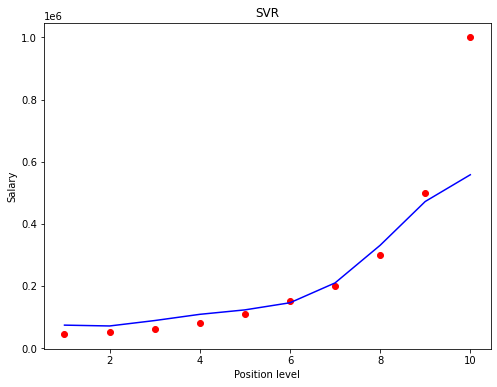

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),
        sc_y.inverse_transform(reg.predict(X)), color="blue")
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()